### Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
from tqdm.notebook import tqdm
import numpy as np
import json
import math
import datetime
import networkx as nx

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

CSV generated in notebook 02b

In [2]:
ranking_df= pd.read_csv(os.path.join('data', 'clean_ranking_2017_2021_v2.csv'), index_col=0, parse_dates=['Date', 'release_date'])

In [3]:
ranking_df['week_of_study']= ranking_df['day_of_study'].apply(lambda x : int(x/7))

In [4]:
ranking_df.head()

Position Track Name         Artist  Streams                     URL  \
2176       177  Footloose  Kenny Loggins    24993  4O4Z8VFczL8MxIOmqVWc1b   
3392       193    Tequila     Dan + Shay    23917  7Il2yWQmsqKgSkLQvHTPUI   
3594       195       Mine          Bazzi    23780  6tHWl8ows5JOZq9Yfaqn3M   
3772       173       Mine          Bazzi    26500  6tHWl8ows5JOZq9Yfaqn3M   
3978       179       Mine          Bazzi    24577  6tHWl8ows5JOZq9Yfaqn3M   

           Date  Region                 song_id release_date  day_of_study  \
2176 2018-01-11  Canada  4O4Z8VFczL8MxIOmqVWc1b   2018-01-11           375   
3392 2018-01-17  Canada  7Il2yWQmsqKgSkLQvHTPUI   2018-01-17           381   
3594 2018-01-18  Canada  6tHWl8ows5JOZq9Yfaqn3M   2018-01-15           382   
3772 2018-01-19  Canada  6tHWl8ows5JOZq9Yfaqn3M   2018-01-15           383   
3978 2018-01-20  Canada  6tHWl8ows5JOZq9Yfaqn3M   2018-01-15           384   

      release_month  week_of_study  
2176              1             53  
3392              1             54  
3594              1             54  
3772              1             54  
3978              1             54

In [5]:
countries_pop = pd.read_csv(os.path.join('data', 'datos_paises_spotify.csv'), sep=';')
countries_pop = countries_pop.fillna(-1)
countries_pop['Country']= countries_pop['Country'].str.replace('\'', '')
countries_pop['Population (2020)']= countries_pop['Population (2020)'].str.replace(',', '').astype(float)
countries_pop= countries_pop.dropna()
countries_pop = countries_pop.set_index('Country')

In [6]:
countries_pop

Population (2020) Spotify listeners
Country                                               
USA                      332074116.0        83,018,529
Canada                    38345338.0        11,300,000
NewZealand                 5126851.0                -1
Iceland                     369870.0                -1
Malaysia                  32790600.0                -1
HongKong                   7474200.0                -1
Greece                    10718565.0                -1
Singapore                  5685807.0                -1
Hungary                    9730772.0                -1
Norway                     5398804.0                -1
Finland                    5509432.0                -1
CzechRepublic             10694480.0                -1
UnitedKingdom             67081234.0                -1
Ireland                    4977400.0                -1
Sweden                    10402070.0                -1
Portugal                  10298252.0                -1
Latvia                     1883700.0                -1
Philippines              110534650.0                -1
Switzerland                8680890.0                -1
Taiwan                    23487509.0                -1
Japan                    125360000.0                -1
Netherlands               17618681.0                -1
Mexico                   126014024.0                -1
Denmark                    5843347.0                -1
Lithuania                  2783483.0                -1
Estonia                    1330068.0                -1
Germany                   83121363.0                -1
Slovakia                   5459781.0                -1
Panama                     4278500.0                -1
CostaRica                  5163038.0                -1
Indonesia                271350000.0                -1
DominicanRepublic         10535535.0                -1
Honduras                   9450711.0                -1
ElSalvador                 6825935.0                -1
Poland                    38182000.0                -1
Ecuador                   17780528.0                -1
Paraguay                   7353038.0                -1
Guatemala                 17109746.0                -1
Columbia                  51049498.0                -1
Turkey                    83614362.0                -1
Peru                      33035304.0                -1
Spain                     47394223.0                -1
Italy                     59169131.0                -1
Chile                     19678363.0                -1
France                    67427000.0                -1
Uruguay                    3554915.0                -1
Luxemborg                   634730.0                -1

In [7]:
countries_pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, USA to Luxemborg
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Population (2020)  47 non-null     float64
 1   Spotify listeners  47 non-null     object 
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [8]:
release_countries = ranking_df[ranking_df['Date']==ranking_df['release_date']][['song_id','Region']]

In [9]:
release_countries.head()

song_id  Region
2176   4O4Z8VFczL8MxIOmqVWc1b  Canada
3392   7Il2yWQmsqKgSkLQvHTPUI  Canada
11564  11GGSyTB8cS9TgONHBOhEX  Canada
12631  43V1z6QToNNWNldV4FEG6r  Canada
16581  4LiMQ6G9n84rDUBs9wtwz6  Canada

In [10]:
release_countries.shape

(4332, 2)

In [11]:
ranking_df['song_id'].nunique()

4363

In [12]:
songs_by_country=release_countries.groupby('Region').count()
songs_by_country['Population']= countries_pop['Population (2020)']

In [13]:
songs_by_country.head()

song_id  Population
Region                        
Argentina       25         NaN
Australia        7         NaN
Austria         11         NaN
Belgium          2         NaN
Bolivia          5         NaN

In [14]:
songs_by_country.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, Argentina to Uruguay
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   song_id     52 non-null     int64  
 1   Population  46 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.2+ KB


### Read genders

In [15]:
song_genres_df = pd.read_csv(os.path.join('data', 'songs_genres.csv'), index_col=0)
song_genres_df.head()

0        1    2    3    4    5    6
4O4Z8VFczL8MxIOmqVWc1b     rock      NaN  NaN  NaN  NaN  NaN  NaN
7Il2yWQmsqKgSkLQvHTPUI  country      pop  NaN  NaN  NaN  NaN  NaN
6tHWl8ows5JOZq9Yfaqn3M      pop      NaN  NaN  NaN  NaN  NaN  NaN
3p0Y1C5jhaqyKW7d9oskXA      rap  hip-hop  NaN  NaN  NaN  NaN  NaN
2yQZwi1P8AkkxxFhQ8rMEK  country      pop  NaN  NaN  NaN  NaN  NaN

In [16]:
import json

# Opening JSON file
f = open(os.path.join('datasets','music_styles_unique.json'))
 
# returns JSON object as
# a dictionary
music_styles = json.load(f)
music_styles.keys()

gender_to_cluster = []
for c, genders in music_styles.items():
    for g in genders:
        gender_to_cluster.append((g,c))
        
gender_cluster_df = pd.DataFrame.from_records(gender_to_cluster, columns='gender cluster'.split())
gender_cluster_df= gender_cluster_df.set_index('gender')
gender_cluster_df.head()

cluster
gender          
pop rock     pop
pop          pop
british      pop
j-pop        pop
k-pop        pop

In [17]:
gender_cluster_df['cluster'].unique()

array(['pop', 'hip-hop', 'rock', 'electronic', 'latin', 'indie',
       'classical and ost', 'folk/traditional', 'rythm and blues',
       'miscellaneous'], dtype=object)

In [18]:
songs_by_country.sum()

song_id       4.332000e+03
Population    1.821747e+09
dtype: float64

In [19]:
songs_by_country

song_id   Population
Region                                 
Argentina               25          NaN
Australia                7          NaN
Austria                 11          NaN
Belgium                  2          NaN
Bolivia                  5          NaN
Brazil                  73          NaN
Canada                  94   38345338.0
Chile                   95   19678363.0
Columbia               105   51049498.0
CostaRica               39    5163038.0
CzechRepublic          125   10694480.0
Denmark                 64    5843347.0
DominicanRepublic       92   10535535.0
Ecuador                 24   17780528.0
ElSalvador              15    6825935.0
Estonia                 15    1330068.0
Finland                 42    5509432.0
France                 308   67427000.0
Germany                268   83121363.0
Greece                  25   10718565.0
Guatemala               41   17109746.0
Honduras                22    9450711.0
HongKong                39    7474200.0
Hungary                 58    9730772.0
Iceland                 69     369870.0
Indonesia              107  271350000.0
Ireland                 94    4977400.0
Italy                  131   59169131.0
Japan                   56  125360000.0
Latvia                  70    1883700.0
Lithuania               65    2783483.0
Malaysia               106   32790600.0
Mexico                 181  126014024.0
Netherlands             64   17618681.0
NewZealand              78    5126851.0
Norway                 116    5398804.0
Panama                  40    4278500.0
Paraguay                81    7353038.0
Peru                    26   33035304.0
Philippines             37  110534650.0
Poland                  39   38182000.0
Portugal               102   10298252.0
Singapore               70    5685807.0
Slovakia                92    5459781.0
Spain                  129   47394223.0
Sweden                 138   10402070.0
Switzerland             29    8680890.0
Taiwan                 193   23487509.0
Turkey                  30   83614362.0
USA                    269  332074116.0
UnitedKingdom          189   67081234.0
Uruguay                137    3554915.0

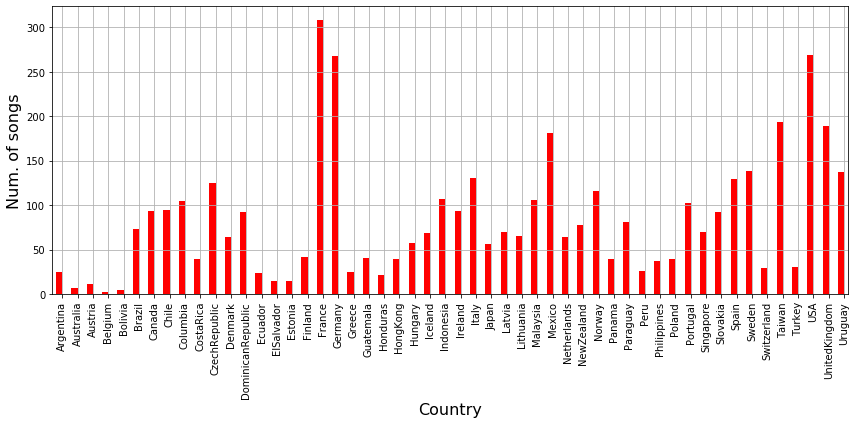

In [20]:
fig = plt.figure(figsize=(12,6)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
#ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

songs_by_country['song_id'].plot(kind='bar', color='red', ax=ax, width=width, position=1, grid=True)
#songs_by_country['Population'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0, grid=True)

#ax2.set_ylabel('Num. of songs', color='red', fontsize=16)
ax.set_ylabel('Num. of songs', fontsize=16)
ax.set_xlabel('Country', fontsize=16)

plt.tight_layout()
plt.savefig(os.path.join('figs','n_songs_by_country.png'))
plt.show()

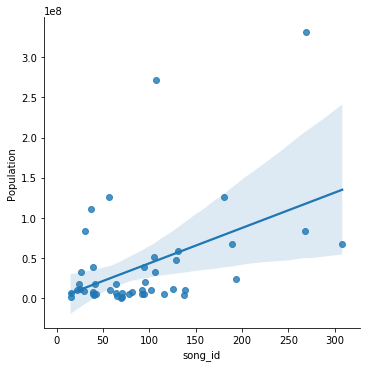

In [21]:
import seaborn as sns
sns.lmplot(x='song_id', y='Population',data=songs_by_country,fit_reg=True);

In [22]:
songs_by_country.corr()

song_id  Population
song_id     1.000000    0.456928
Population  0.456928    1.000000

In [23]:
countries= ranking_df['Region'].unique()
countries

array(['Canada', 'Switzerland', 'Chile', 'Columbia', 'CostaRica',
       'CzechRepublic', 'Germany', 'Denmark', 'DominicanRepublic',
       'Ecuador', 'Estonia', 'Spain', 'Finland', 'France',
       'UnitedKingdom', 'Greece', 'Guatemala', 'HongKong', 'Honduras',
       'Hungary', 'Indonesia', 'Ireland', 'Iceland', 'Italy', 'Japan',
       'Lithuania', 'Luxemborg', 'Latvia', 'Mexico', 'Malaysia',
       'Netherlands', 'Norway', 'NewZealand', 'Panama', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Paraguay', 'Sweden',
       'Singapore', 'Slovakia', 'ElSalvador', 'Turkey', 'Taiwan', 'USA',
       'Uruguay', 'Argentina', 'Austria', 'Australia', 'Belgium',
       'Bolivia', 'Brazil'], dtype=object)

In [24]:
len(countries)

53

## Generate graph with fuzzy edges

In [25]:
from datetime import date, timedelta

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

In [26]:
release_countries= release_countries.set_index('song_id')

In [27]:
release_countries.head()

Region
song_id                       
4O4Z8VFczL8MxIOmqVWc1b  Canada
7Il2yWQmsqKgSkLQvHTPUI  Canada
11GGSyTB8cS9TgONHBOhEX  Canada
43V1z6QToNNWNldV4FEG6r  Canada
4LiMQ6G9n84rDUBs9wtwz6  Canada

Dict to convert countries to numerical code

In [28]:
countries_to_num = []
l=[(i,j) for i,j in zip(countries,np.arange(1,len(countries),1))]
countries_mapping = dict(l)
countries_mapping

{'Canada': 1,
 'Switzerland': 2,
 'Chile': 3,
 'Columbia': 4,
 'CostaRica': 5,
 'CzechRepublic': 6,
 'Germany': 7,
 'Denmark': 8,
 'DominicanRepublic': 9,
 'Ecuador': 10,
 'Estonia': 11,
 'Spain': 12,
 'Finland': 13,
 'France': 14,
 'UnitedKingdom': 15,
 'Greece': 16,
 'Guatemala': 17,
 'HongKong': 18,
 'Honduras': 19,
 'Hungary': 20,
 'Indonesia': 21,
 'Ireland': 22,
 'Iceland': 23,
 'Italy': 24,
 'Japan': 25,
 'Lithuania': 26,
 'Luxemborg': 27,
 'Latvia': 28,
 'Mexico': 29,
 'Malaysia': 30,
 'Netherlands': 31,
 'Norway': 32,
 'NewZealand': 33,
 'Panama': 34,
 'Peru': 35,
 'Philippines': 36,
 'Poland': 37,
 'Portugal': 38,
 'Paraguay': 39,
 'Sweden': 40,
 'Singapore': 41,
 'Slovakia': 42,
 'ElSalvador': 43,
 'Turkey': 44,
 'Taiwan': 45,
 'USA': 46,
 'Uruguay': 47,
 'Argentina': 48,
 'Austria': 49,
 'Australia': 50,
 'Belgium': 51,
 'Bolivia': 52}

In [29]:
def compute_weight_fn(target_country, song_ranking_, init_day, d_curr, week_diff, weight_coeff_):
    
    country_values = []
    weights = []  
    for d_target in daterange(init_day, d_curr+timedelta(1)):
        rank =song_ranking_[(song_ranking_['Region']==target_country) & 
                                    (song_ranking_['Date']==d_target)]['Position']
        if not rank.empty:
            rank_value = rank.values[0]

            diff_ = (d_target-d_curr).days
            weight = math.exp((diff_/weight_coeff_))

            value_ = weight * (float(rank_value)**-1)
            country_values.append(value_)
                
    link_value = ((float(week_diff)**-1) * sum(country_values))
        
    return link_value


def calculate_link_values(graph_, min_weights=10):
    mean_links_lst = []
    sum_links_lst = []
    for countries, weight in graph_.items():
        o = countries.split('-')[0]
        d = countries.split('-')[1]
        if len(weight) >= min_weights:
            mean_links_lst.append((o,d,sum(weight)/len(weight)))
            sum_links_lst.append((o,d,sum(weight)))
    
    mean_edges_df = pd.DataFrame.from_records(mean_links_lst, columns='origin destination weight'.split())
    sum_edges_df = pd.DataFrame.from_records(sum_links_lst, columns='origin destination weight'.split())
    
    return mean_edges_df, sum_edges_df

In [30]:
n_day_lags = 14
global_graph_dict = {}
gender_graph_dict = {}

country_propagation = {}

country_seq_increments = {}

weight_coeff_= int(n_day_lags/2)


for s in tqdm(ranking_df['song_id'].unique()):
 
    country_songs = set()
    all_countries = set()
    prev_origins = set()
    
    song_ranking= ranking_df[ranking_df['song_id']==s]
    dates=song_ranking.groupby('Region')['Date'].min().to_frame()
    dates_sort=dates.sort_values('Date')
    dates_sort= dates_sort.reset_index().set_index('Date')
    
    dates_lst=dates_sort.index.unique()

    #src_lst = []
    #target_lst = []
    #weight_lst = []

    num_countries_at_d = -1
    
    for d in dates_lst:
        
        countries_at_d = set(song_ranking[song_ranking['Date']==d]['Region'].unique())

        num_countries_at_d = len(countries_at_d)

        # We only use as origins countries that have not act as origin so far.
        o_countries = list((country_songs.intersection(countries_at_d))-prev_origins)
        d_countries = countries_at_d-country_songs

        ncountries_inc = len(d_countries)
        inc_= country_seq_increments.get(ncountries_inc,0)
        inc_+=1
        country_seq_increments[ncountries_inc]= inc_
        
        for oc in o_countries:
            init_week = song_ranking[song_ranking['Region']==oc]['week_of_study'].min()
            init_date = song_ranking[song_ranking['Region']==oc]['Date'].min()

            curr_week = song_ranking[(song_ranking['Region']==oc) & 
                                     (song_ranking['Date']==d)]['week_of_study'].values[0]
                        
            week_diff = (curr_week-init_week)+1
            
            init_day = d - timedelta(n_day_lags)
            
            days_diff = (d-init_date).days
            if  days_diff < n_day_lags:
                init_day = d - timedelta(days_diff)

            
            link_value= compute_weight_fn(oc, 
                                           song_ranking, 
                                           init_day, 
                                           d, 
                                           week_diff, 
                                           weight_coeff_)
            if link_value >= 0.01:
                for dc in d_countries:
                    if dc not in all_countries:
                        #src_lst.append(oc)
                        #target_lst.append(dc)
                        #weight_lst.append(link_value)

                        k = f'{oc}-{dc}'
                        link_weight_lst = global_graph_dict.get(k, list())
                        link_weight_lst.append(link_value)

                        global_graph_dict[k]=link_weight_lst
                        
                        if s in song_genres_df.index:
                            genres_ = song_genres_df.loc[s].values
                            for g in genres_:
                                if g in gender_cluster_df.index:
                                    g_clus = gender_cluster_df.loc[g,'cluster']
                                    g_dict= gender_graph_dict.get(g_clus,{})
                                    
                                    link_weight_lst = g_dict.get(k, list())
                                    link_weight_lst.append(link_value)

                                    g_dict[k]=link_weight_lst
                                    gender_graph_dict[g_clus]= g_dict
                        
        country_songs = countries_at_d
        all_countries = all_countries.union(countries_at_d)
        prev_origins = prev_origins.union(o_countries)

    try:
        release_country = release_countries.loc[s]['Region']
        propagation_ = country_propagation.get(release_country,[0]*len(countries))
        propagation_[num_countries_at_d-1]+=1
        country_propagation[release_country]=propagation_
    except:
        print(f"No release country for song {s}")


  0%|          | 0/4363 [00:00<?, ?it/s]

No release country for song 187Pge0WmJNoS73kaIORSE
No release country for song 00zzSEe82JTtz68XlARnh7
No release country for song 74n5d5M21JnC4WJ6gdkggK
No release country for song 5EKHbW7mXcAR4hCyS3YXjb
No release country for song 2X8sssaxS5GReg6945B6RW
No release country for song 5ixqGGFu0hdHfErdp32QwT
No release country for song 4E6RdcCWMiHTu7zy1VTNDo
No release country for song 3GmJxfnUDrIs1iCfKUELFz
No release country for song 3tv697PZNnaQN0Mn2zGhS5
No release country for song 1vG3YuKRYqPwTmNmYgqkpg
No release country for song 3tc8Z4lGzOIwmIVftsxO6o
No release country for song 15k1TDabqSEmyXOwMq9RM7
No release country for song 2JTir3y1VuJQmexiTCMcTP
No release country for song 3rRin3LyLY92kpEbkCgwf4
No release country for song 7EWXP47VlXKO3r7mNxuWHw
No release country for song 5m5aY6S9ttfIG157xli2Rs
No release country for song 1ere9b9vDw2N3m9d4uiXxa
No release country for song 2nZj5YymF54qhAu7RneVP6
No release country for song 2MZQAvsA7aZDssppBLRxYp
No release country for song 158

In [31]:
mean_edges_df, sum_edges_df= calculate_link_values(global_graph_dict, min_weights=1)

gender_mean_edges = {}
gender_sum_edges = {}

for g, dict_ in gender_graph_dict.items():
    gender_mean_edges[g], gender_sum_edges[g]= calculate_link_values(dict_, min_weights=1)

country_propagation_df= pd.DataFrame.from_dict(country_propagation, orient='index')

### Study sudden increments per song

In [32]:
country_increment_df= pd.DataFrame.from_dict(country_seq_increments, orient='index')
country_increment_df = country_increment_df.sort_index()
country_increment_df.head()

0
1  11847
2   1651
3    678
4    322
5    163

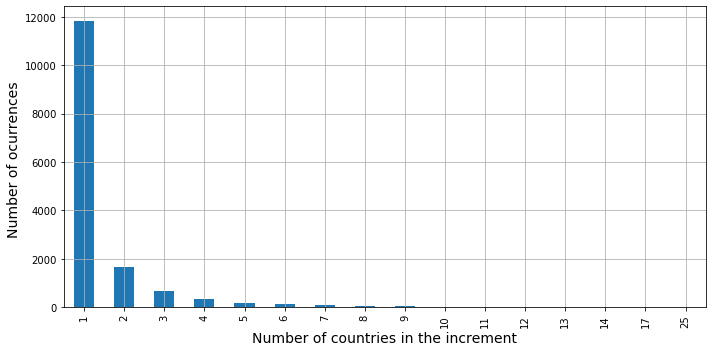

In [33]:
ax=country_increment_df.plot(kind='bar', grid=True, legend=False, figsize=(10,5));
ax.set_xlabel('Number of countries in the increment', fontsize=14)
ax.set_ylabel('Number of ocurrences ', fontsize=14);
plt.tight_layout()
plt.savefig(os.path.join('figs','increment_distribution.png'))

### Study the songs by their origin country

In [34]:
country_propagation_df.head()

0    1   2   3   4   5   6   7   8   9   ...  43  44  45  46  47  \
Canada      17   35   8  12   2   3   1   2   0   2  ...   0   1   0   0   0   
USA         22  120  31  20  11   9   7   2   5   5  ...   1   0   2   0   0   
Turkey       5   16   4   1   1   1   1   0   0   0  ...   0   0   0   0   0   
Sweden      30   67  17   5   3   3   0   0   1   0  ...   0   0   0   0   0   
NewZealand  12   23   8   2   6   3   7   3   3   1  ...   1   0   0   0   0   

            48  49  50  51  52  
Canada       0   0   0   0   0  
USA          0   0   0   0   0  
Turkey       0   0   0   0   0  
Sweden       0   0   0   0   0  
NewZealand   0   0   0   0   0  

[5 rows x 53 columns]

In [35]:
country_propagation_df.describe()

0           1          2          3          4          5   \
count  52.000000   52.000000  52.000000  52.000000  52.000000  52.000000   
mean   13.480769   38.942308  10.730769   5.173077   2.903846   2.423077   
std    10.193213   42.557188  13.546022   6.067338   2.945649   2.387436   
min     0.000000    1.000000   0.000000   0.000000   0.000000   0.000000   
25%     6.750000   11.500000   3.000000   1.000000   1.000000   1.000000   
50%    12.000000   26.000000   7.500000   3.000000   2.000000   2.000000   
75%    18.500000   47.750000  13.250000   8.000000   4.000000   3.250000   
max    41.000000  199.000000  84.000000  33.000000  13.000000   9.000000   

              6          7          8          9   ...         43         44  \
count  52.000000  52.000000  52.000000  52.000000  ...  52.000000  52.000000   
mean    1.596154   1.153846   0.846154   0.903846  ...   0.038462   0.019231   
std     2.207471   1.513140   1.073470   1.332249  ...   0.194184   0.138675   
min     0.000000   0.000000   0.000000   0.000000  ...   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000  ...   0.000000   0.000000   
50%     1.000000   1.000000   1.000000   0.000000  ...   0.000000   0.000000   
75%     2.000000   2.000000   1.000000   1.000000  ...   0.000000   0.000000   
max     8.000000   7.000000   5.000000   6.000000  ...   1.000000   1.000000   

              45         46    47    48    49         50    51    52  
count  52.000000  52.000000  52.0  52.0  52.0  52.000000  52.0  52.0  
mean    0.057692   0.019231   0.0   0.0   0.0   0.019231   0.0   0.0  
std     0.307645   0.138675   0.0   0.0   0.0   0.138675   0.0   0.0  
min     0.000000   0.000000   0.0   0.0   0.0   0.000000   0.0   0.0  
25%     0.000000   0.000000   0.0   0.0   0.0   0.000000   0.0   0.0  
50%     0.000000   0.000000   0.0   0.0   0.0   0.000000   0.0   0.0  
75%     0.000000   0.000000   0.0   0.0   0.0   0.000000   0.0   0.0  
max     2.000000   1.000000   0.0   0.0   0.0   1.000000   0.0   0.0  

[8 rows x 53 columns]

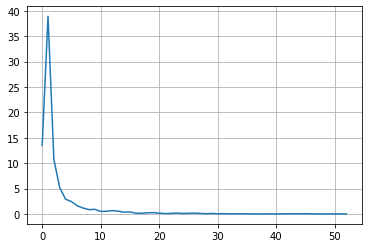

In [36]:
country_propagation_df.describe().loc['mean'].plot(grid=True)
plt.show()

In [37]:
country_propagation_agg_df = pd.DataFrame(0,index=country_propagation_df.index, columns=['1','2-5', '6-10', '11-20', '+20'])

In [38]:
country_propagation_agg_df['1']=country_propagation_df[0]
country_propagation_agg_df['2-5']=country_propagation_df[[1,2,3,4]].sum(axis=1)
country_propagation_agg_df['6-10']=country_propagation_df[[5,6,7,8,9]].sum(axis=1)
country_propagation_agg_df['11-20']=country_propagation_df[np.arange(11,21)].sum(axis=1)
country_propagation_agg_df['+20']=country_propagation_df[np.arange(21,47)].sum(axis=1)

In [39]:
country_propagation_agg_df

1  2-5  6-10  11-20  +20
Canada             17   57     8      4    5
USA                22  182    28     22   14
Turkey              5   22     2      1    0
Sweden             30   92     4      7    4
NewZealand         12   39    17      8    2
Japan               7   42     7      0    0
Netherlands        18   39     3      0    3
Malaysia           18   80     5      1    1
Portugal           41   57     3      1    0
Switzerland         9   14     1      3    2
Ireland            16   52    15      5    5
CzechRepublic       6  115     3      1    0
Denmark            12   30     9      5    7
UnitedKingdom      32  130    16      5    5
Hungary            18   25     9      3    1
Poland             13   20     6      0    0
Taiwan             39  147     7      0    0
Iceland             8   32    20      7    0
Singapore          11   53     5      0    1
Guatemala          14   22     4      0    1
Greece              4   13     2      5    1
Philippines        12   21     3      1    0
Indonesia           9   83    12      0    3
Norway             25   62    12     13    4
France              9  295     1      2    1
Germany            20  237     6      4    1
Finland            13   23     4      1    0
Lithuania           4   41    12      5    3
Slovakia            5   83     3      0    0
Chile              22   48    10     14    1
Latvia              8   57     3      2    0
Italy              37   85     7      0    1
Uruguay            28   95     7      4    0
CostaRica          22   14     2      1    0
DominicanRepublic   9   57    14     12    0
Spain              15   81    20     11    0
Columbia           12   70    14      9    0
Ecuador             7    9     7      1    0
Panama              2   28     3      5    2
Paraguay           22   49     6      3    0
Mexico             21  129    25      3    0
Honduras            8   10     3      1    0
Peru                9   12     4      1    0
ElSalvador          2   11     1      1    0
Estonia             7    5     3      0    0
HongKong           14   24     1      0    0
Argentina           0   24     1      0    0
Bolivia             0    3     1      0    0
Belgium             0    1     1      0    0
Austria             0   10     0      1    0
Australia           2    5     0      0    0
Brazil              5   68     0      0    0

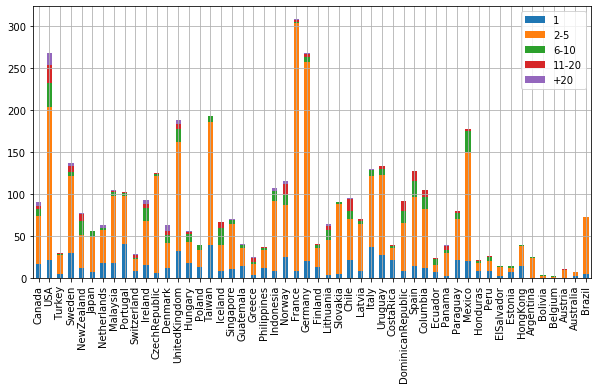

In [40]:
country_propagation_agg_df.plot.bar(stacked=True, figsize=(10,5), grid=True);

In [41]:
country_propagation_norm_agg_df= country_propagation_agg_df.div(country_propagation_agg_df.sum(axis=1), axis=0)
country_propagation_norm_agg_df= country_propagation_norm_agg_df.sort_index()

In [42]:
country_propagation_norm_agg_df

1       2-5      6-10     11-20       +20
Argentina          0.000000  0.960000  0.040000  0.000000  0.000000
Australia          0.285714  0.714286  0.000000  0.000000  0.000000
Austria            0.000000  0.909091  0.000000  0.090909  0.000000
Belgium            0.000000  0.500000  0.500000  0.000000  0.000000
Bolivia            0.000000  0.750000  0.250000  0.000000  0.000000
Brazil             0.068493  0.931507  0.000000  0.000000  0.000000
Canada             0.186813  0.626374  0.087912  0.043956  0.054945
Chile              0.231579  0.505263  0.105263  0.147368  0.010526
Columbia           0.114286  0.666667  0.133333  0.085714  0.000000
CostaRica          0.564103  0.358974  0.051282  0.025641  0.000000
CzechRepublic      0.048000  0.920000  0.024000  0.008000  0.000000
Denmark            0.190476  0.476190  0.142857  0.079365  0.111111
DominicanRepublic  0.097826  0.619565  0.152174  0.130435  0.000000
Ecuador            0.291667  0.375000  0.291667  0.041667  0.000000
ElSalvador         0.133333  0.733333  0.066667  0.066667  0.000000
Estonia            0.466667  0.333333  0.200000  0.000000  0.000000
Finland            0.317073  0.560976  0.097561  0.024390  0.000000
France             0.029221  0.957792  0.003247  0.006494  0.003247
Germany            0.074627  0.884328  0.022388  0.014925  0.003731
Greece             0.160000  0.520000  0.080000  0.200000  0.040000
Guatemala          0.341463  0.536585  0.097561  0.000000  0.024390
Honduras           0.363636  0.454545  0.136364  0.045455  0.000000
HongKong           0.358974  0.615385  0.025641  0.000000  0.000000
Hungary            0.321429  0.446429  0.160714  0.053571  0.017857
Iceland            0.119403  0.477612  0.298507  0.104478  0.000000
Indonesia          0.084112  0.775701  0.112150  0.000000  0.028037
Ireland            0.172043  0.559140  0.161290  0.053763  0.053763
Italy              0.284615  0.653846  0.053846  0.000000  0.007692
Japan              0.125000  0.750000  0.125000  0.000000  0.000000
Latvia             0.114286  0.814286  0.042857  0.028571  0.000000
Lithuania          0.061538  0.630769  0.184615  0.076923  0.046154
Malaysia           0.171429  0.761905  0.047619  0.009524  0.009524
Mexico             0.117978  0.724719  0.140449  0.016854  0.000000
Netherlands        0.285714  0.619048  0.047619  0.000000  0.047619
NewZealand         0.153846  0.500000  0.217949  0.102564  0.025641
Norway             0.215517  0.534483  0.103448  0.112069  0.034483
Panama             0.050000  0.700000  0.075000  0.125000  0.050000
Paraguay           0.275000  0.612500  0.075000  0.037500  0.000000
Peru               0.346154  0.461538  0.153846  0.038462  0.000000
Philippines        0.324324  0.567568  0.081081  0.027027  0.000000
Poland             0.333333  0.512821  0.153846  0.000000  0.000000
Portugal           0.401961  0.558824  0.029412  0.009804  0.000000
Singapore          0.157143  0.757143  0.071429  0.000000  0.014286
Slovakia           0.054945  0.912088  0.032967  0.000000  0.000000
Spain              0.118110  0.637795  0.157480  0.086614  0.000000
Sweden             0.218978  0.671533  0.029197  0.051095  0.029197
Switzerland        0.310345  0.482759  0.034483  0.103448  0.068966
Taiwan             0.202073  0.761658  0.036269  0.000000  0.000000
Turkey             0.166667  0.733333  0.066667  0.033333  0.000000
USA                0.082090  0.679104  0.104478  0.082090  0.052239
UnitedKingdom      0.170213  0.691489  0.085106  0.026596  0.026596
Uruguay            0.208955  0.708955  0.052239  0.029851  0.000000

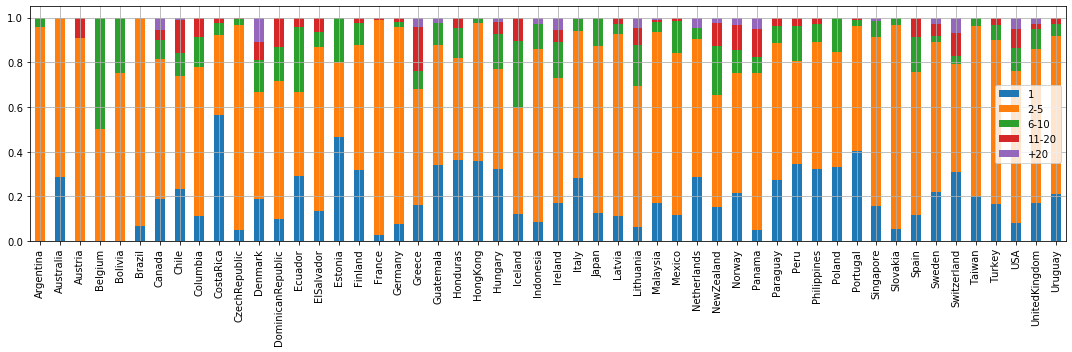

In [43]:
country_propagation_norm_agg_df.plot.bar(stacked=True, figsize=(15,5), grid=True);
plt.tight_layout()
plt.savefig(os.path.join('figs','song_by_country_propagation.png'))

### Analysis of the link weights

In [44]:
mean_edges_df.head()

origin destination    weight
0         USA      Canada  0.022814
1      Canada  NewZealand  0.017994
2  NewZealand     Iceland  0.018840
3     Iceland    Malaysia  0.026403
4    Malaysia    HongKong  0.023201

In [45]:
mean_edges_df['weight'].describe()

count    1831.000000
mean        0.032581
std         0.083685
min         0.010010
25%         0.014080
50%         0.017733
75%         0.025373
max         1.917256
Name: weight, dtype: float64

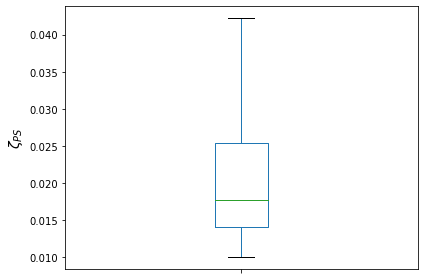

In [46]:
ax= mean_edges_df.plot(kind='box', showfliers=False);
#ax.set_xlabel('$\zeta_{PS}$', fontsize=14)
ax.set_ylabel('$\zeta_{PS}$', fontsize=14);
plt.xticks([1], [''])
plt.tight_layout()
plt.savefig(os.path.join('figs','threshold_dist.png'))

In [47]:
sum_edges_df.head()

origin destination    weight
0         USA      Canada  3.444919
1      Canada  NewZealand  0.611795
2  NewZealand     Iceland  0.282596
3     Iceland    Malaysia  0.132016
4    Malaysia    HongKong  0.440826

In [48]:
sum_edges_df['weight'].describe()

count    1831.000000
mean        0.396418
std         2.402467
min         0.010010
25%         0.026164
50%         0.086084
75%         0.239874
max        59.057851
Name: weight, dtype: float64

In [49]:
def keep_nlargest(df, n):
    largest=df.groupby('origin')['weight'].nlargest(n).to_frame()
    l=largest.index.tolist()
    #print(l)
    index_to_keep= [j[1] for j in l]
    #print(index_to_keep)
    return df.loc[index_to_keep]

In [50]:
top_to_keep= 1
mean_edges_largest_df=keep_nlargest(mean_edges_df, top_to_keep)
mean_edges_largest_df.head(10)

origin    destination    weight
1656  Argentina        Ecuador  0.248638
1402  Australia         Mexico  0.043449
1498    Austria      Luxemborg  0.366393
1499    Belgium      Luxemborg  0.536234
1824    Bolivia  UnitedKingdom  0.027678
1829     Brazil       Portugal  0.131226
1399     Canada          Spain  0.032274
1241      Chile        Uruguay  0.055815
1439   Columbia    Switzerland  0.033188
986   CostaRica    Netherlands  0.030908

In [51]:
sum_edges_largest_df=keep_nlargest(sum_edges_df,top_to_keep)
sum_edges_largest_df.head(10)

origin  destination    weight
1604  Argentina    CostaRica  0.527437
1457  Australia   NewZealand  0.200190
1588    Austria  Switzerland  2.610758
1499    Belgium    Luxemborg  2.144935
1655    Bolivia         Peru  0.133048
1829     Brazil     Portugal  7.479910
94       Canada          USA  0.736952
1241      Chile      Uruguay  1.786074
152    Columbia      Ecuador  1.415189
570   CostaRica       Panama  0.374112

### Generate graph

In [52]:
def plot_graph(G):
    pos = nx.kamada_kawai_layout(G);
    plt.figure(3,figsize=(12,12)) 
    nx.draw_networkx_nodes(G, pos);
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.3);
    nx.draw_networkx_labels(G, pos, font_size=15, font_color='red')

    plt.axis("off")

    plt.show()

def convert_dataframe_for_chor_fn(df):
    countries = df['origin'].unique()
    out_df = pd.DataFrame(0, index=countries, columns=countries)
    
    for i, r in df.iterrows():
        out_df.loc[r['origin'],r['destination']] = r['weight']
    
    out_df=out_df.fillna(0)
    return out_df

from matplotlib_chord import chordDiagram, hex2rgb

def generate_chord_plot(df, fig_name):
    X= df.to_numpy()
    
    ax = plt.axes([0,0,2,3])

    nodePos = chordDiagram(X, ax, colors=sns.color_palette("bright", df.shape[0]))
    ax.axis('off')
    prop = dict(fontsize=5*2, ha='center', va='center')
    
    nodes = df.index
    for i in range(len(nodes)):
        if nodePos[i][2]<= 0:
            ax.text(nodePos[i][0], nodePos[i][1], nodes[i], rotation=nodePos[i][2]+90, **prop)
        else:
            ax.text(nodePos[i][0], nodePos[i][1], nodes[i], rotation=nodePos[i][2]-90, **prop)
            
    plt.savefig(os.path.join('figs', f'{fig_name}.png'), 
                dpi=300, 
                transparent=True, 
                box_inches='tight', 
                pad_inches=0.02)
    #plt.show()
    #ax.plot().savefig(os.path.join('figs', f'{fig_name}.png'))
    #plt.savefig(os.path.join('figs', f'{fig_name}.png'))

def calculate_graph_metrics(G):
    b_centrality =nx.betweenness_centrality(G)
    d_centrality =nx.degree_centrality(G)
    c_centrality =nx.closeness_centrality(G)
    out_centrality = nx.out_degree_centrality(G)
    in_centrality = nx.in_degree_centrality(G)

    centrality_df = pd.DataFrame.from_records([b_centrality]).T
    centrality_df.columns=['betweenness']

    centrality_df['degree'] = pd.DataFrame.from_records([d_centrality]).T
    centrality_df['closeness'] = pd.DataFrame.from_records([c_centrality]).T
    centrality_df['in_degree'] = pd.DataFrame.from_records([in_centrality]).T
    centrality_df['out_degree'] = pd.DataFrame.from_records([out_centrality]).T

    centrality_df['diff_degree']= centrality_df['out_degree'] - centrality_df['in_degree']
    
    return centrality_df

def complete_graph_nodes(G):
    graph_nodes= set(G.nodes)
    all_nodes = set(countries)
    nodes_to_add = all_nodes - graph_nodes
    for n in nodes_to_add:
        G.add_node(n)
    return G

### Global graph

In [53]:
min_mean_weight= mean_edges_df['weight'].quantile(0.9)
min_sum_weight= sum_edges_df['weight'].quantile(0.9)

mean_G = nx.from_pandas_edgelist(mean_edges_df[mean_edges_df['weight']>=min_mean_weight], 
                                 'origin', 'destination', ['weight'], create_using=nx.DiGraph())
mean_G = complete_graph_nodes(mean_G)

sum_G= nx.from_pandas_edgelist(sum_edges_df[sum_edges_df['weight']>=min_sum_weight], 
                               'origin', 'destination', ['weight'], create_using=nx.DiGraph())
sum_G = complete_graph_nodes(sum_G)

In [54]:
nx.from_pandas_edgelist(mean_edges_df, 
                                 'origin', 'destination', ['weight'], create_using=nx.DiGraph()).number_of_edges()

1831

In [55]:
chord_df = convert_dataframe_for_chor_fn(sum_edges_largest_df)

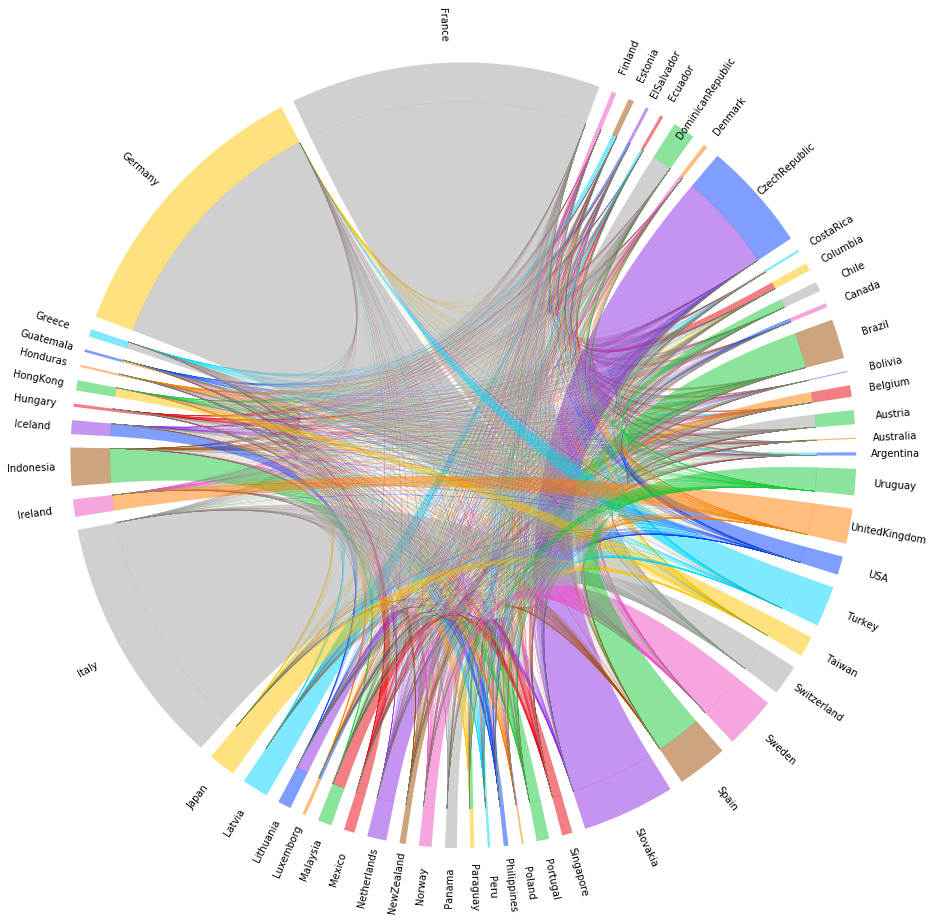

In [56]:
generate_chord_plot(chord_df, 'global_chord_sum')

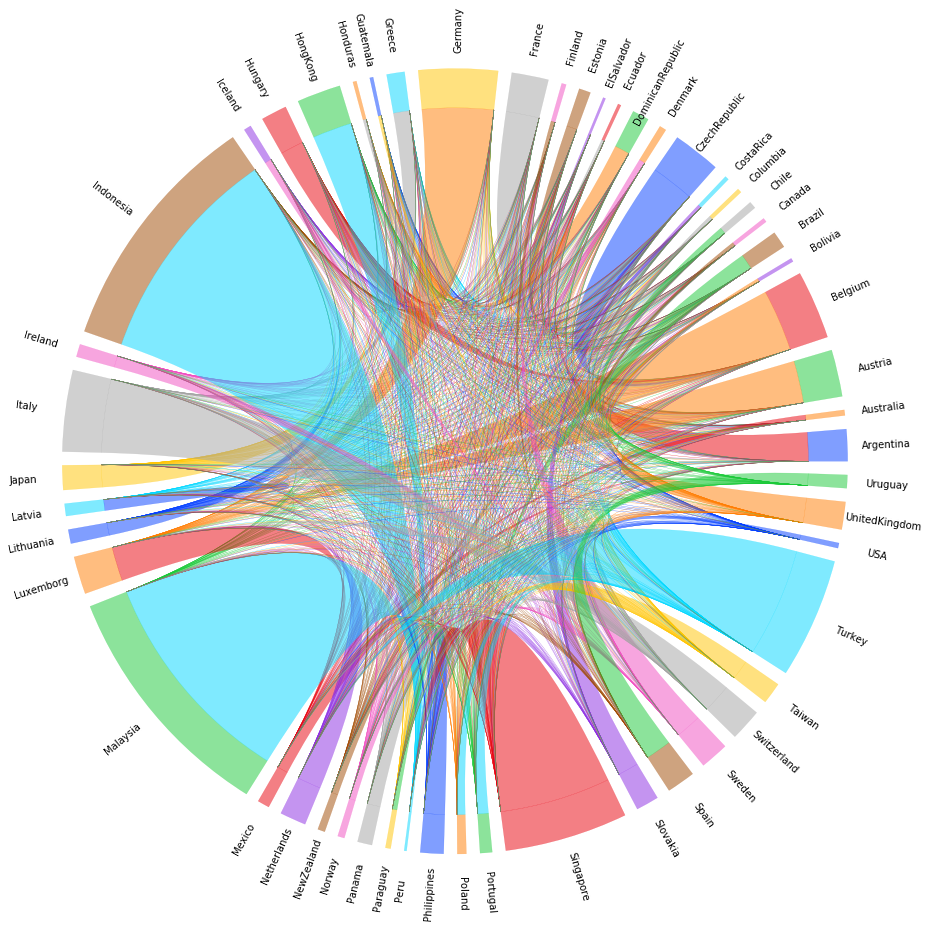

In [57]:
chord_df = convert_dataframe_for_chor_fn(mean_edges_largest_df)
generate_chord_plot(chord_df, 'global_chord_mean')

In [58]:
sum_G_metrics= calculate_graph_metrics(sum_G)
mean_G_metrics= calculate_graph_metrics(mean_G)

In [61]:
mean_G_metrics.sort_values('betweenness', ascending=False)

betweenness    degree  closeness  in_degree  out_degree  \
Luxemborg             0.215227  0.384615   0.249784   0.134615    0.250000   
Switzerland           0.136551  0.326923   0.281402   0.173077    0.153846   
Turkey                0.118033  0.211538   0.258497   0.096154    0.115385   
Portugal              0.114408  0.134615   0.264652   0.076923    0.057692   
Sweden                0.091837  0.211538   0.239041   0.115385    0.096154   
Spain                 0.088021  0.192308   0.239041   0.096154    0.096154   
Japan                 0.079062  0.211538   0.195007   0.038462    0.173077   
Austria               0.065704  0.230769   0.261538   0.134615    0.096154   
Belgium               0.063405  0.230769   0.252622   0.153846    0.076923   
Ireland               0.047370  0.250000   0.154380   0.076923    0.173077   
Iceland               0.045215  0.134615   0.193311   0.076923    0.057692   
Italy                 0.044470  0.230769   0.209724   0.057692    0.173077   
Uruguay               0.042680  0.192308   0.203952   0.057692    0.134615   
Brazil                0.035366  0.057692   0.121480   0.019231    0.038462   
Poland                0.033558  0.096154   0.182219   0.057692    0.038462   
Norway                0.030552  0.173077   0.209724   0.134615    0.038462   
CzechRepublic         0.029850  0.153846   0.244294   0.096154    0.057692   
NewZealand            0.029333  0.057692   0.142505   0.038462    0.019231   
Lithuania             0.029105  0.230769   0.152266   0.038462    0.192308   
Germany               0.026722  0.192308   0.231571   0.057692    0.134615   
Indonesia             0.021522  0.115385   0.157665   0.019231    0.096154   
Mexico                0.021128  0.134615   0.220107   0.076923    0.057692   
UnitedKingdom         0.019490  0.173077   0.125598   0.019231    0.153846   
Netherlands           0.019352  0.134615   0.224553   0.096154    0.038462   
Taiwan                0.018087  0.096154   0.157665   0.038462    0.057692   
DominicanRepublic     0.016214  0.115385   0.176435   0.019231    0.096154   
Chile                 0.013835  0.153846   0.255526   0.134615    0.019231   
Greece                0.012981  0.096154   0.200277   0.038462    0.057692   
Argentina             0.012397  0.115385   0.206646   0.038462    0.076923   
France                0.007696  0.115385   0.198489   0.019231    0.096154   
Denmark               0.006973  0.134615   0.252622   0.115385    0.019231   
Panama                0.006957  0.076923   0.214161   0.038462    0.038462   
Slovakia              0.005260  0.134615   0.236498   0.076923    0.057692   
Estonia               0.004438  0.173077   0.019231   0.019231    0.153846   
Hungary               0.004406  0.096154   0.220107   0.057692    0.038462   
HongKong              0.003724  0.134615   0.157665   0.038462    0.096154   
Philippines           0.001819  0.076923   0.196314   0.038462    0.038462   
Singapore             0.000864  0.076923   0.164739   0.038462    0.038462   
Malaysia              0.000110  0.096154   0.218127   0.076923    0.019231   
Ecuador               0.000000  0.057692   0.209438   0.057692    0.000000   
Guatemala             0.000000  0.038462   0.197964   0.038462    0.000000   
Peru                  0.000000  0.173077   0.307895   0.173077    0.000000   
Canada                0.000000  0.096154   0.212314   0.096154    0.000000   
Finland               0.000000  0.057692   0.226516   0.057692    0.000000   
ElSalvador            0.000000  0.038462   0.175804   0.038462    0.000000   
CostaRica             0.000000  0.076923   0.237179   0.076923    0.000000   
USA                   0.000000  0.057692   0.230958   0.057692    0.000000   
Honduras              0.000000  0.019231   0.146321   0.019231    0.000000   
Columbia              0.000000  0.038462   0.193202   0.038462    0.000000   
Paraguay              0.000000  0.096154   0.273880   0.096154    0.000000   
Bolivia               0.000000  0.038462 

In [69]:
mean_G_metrics['betweenness'].to_frame().sort_values('betweenness', ascending=False).to_latex()

'\\begin{tabular}{lr}\n\\toprule\n{} &  betweenness \\\\\n\\midrule\nLuxemborg         &     0.215227 \\\\\nSwitzerland       &     0.136551 \\\\\nTurkey            &     0.118033 \\\\\nPortugal          &     0.114408 \\\\\nSweden            &     0.091837 \\\\\nSpain             &     0.088021 \\\\\nJapan             &     0.079062 \\\\\nAustria           &     0.065704 \\\\\nBelgium           &     0.063405 \\\\\nIreland           &     0.047370 \\\\\nIceland           &     0.045215 \\\\\nItaly             &     0.044470 \\\\\nUruguay           &     0.042680 \\\\\nBrazil            &     0.035366 \\\\\nPoland            &     0.033558 \\\\\nNorway            &     0.030552 \\\\\nCzechRepublic     &     0.029850 \\\\\nNewZealand        &     0.029333 \\\\\nLithuania         &     0.029105 \\\\\nGermany           &     0.026722 \\\\\nIndonesia         &     0.021522 \\\\\nMexico            &     0.021128 \\\\\nUnitedKingdom     &     0.019490 \\\\\nNetherlands       &     0.019352 \

In [59]:
mean_G_metrics.sort_values('out_degree', ascending=False)

betweenness    degree  closeness  in_degree  out_degree  \
Luxemborg             0.215227  0.384615   0.249784   0.134615    0.250000   
Lithuania             0.029105  0.230769   0.152266   0.038462    0.192308   
Italy                 0.044470  0.230769   0.209724   0.057692    0.173077   
Ireland               0.047370  0.250000   0.154380   0.076923    0.173077   
Japan                 0.079062  0.211538   0.195007   0.038462    0.173077   
Estonia               0.004438  0.173077   0.019231   0.019231    0.153846   
Switzerland           0.136551  0.326923   0.281402   0.173077    0.153846   
UnitedKingdom         0.019490  0.173077   0.125598   0.019231    0.153846   
Uruguay               0.042680  0.192308   0.203952   0.057692    0.134615   
Germany               0.026722  0.192308   0.231571   0.057692    0.134615   
Latvia                0.000000  0.115385   0.000000   0.000000    0.115385   
Turkey                0.118033  0.211538   0.258497   0.096154    0.115385   
Austria               0.065704  0.230769   0.261538   0.134615    0.096154   
Sweden                0.091837  0.211538   0.239041   0.115385    0.096154   
France                0.007696  0.115385   0.198489   0.019231    0.096154   
Spain                 0.088021  0.192308   0.239041   0.096154    0.096154   
DominicanRepublic     0.016214  0.115385   0.176435   0.019231    0.096154   
Indonesia             0.021522  0.115385   0.157665   0.019231    0.096154   
HongKong              0.003724  0.134615   0.157665   0.038462    0.096154   
Argentina             0.012397  0.115385   0.206646   0.038462    0.076923   
Belgium               0.063405  0.230769   0.252622   0.153846    0.076923   
Iceland               0.045215  0.134615   0.193311   0.076923    0.057692   
Taiwan                0.018087  0.096154   0.157665   0.038462    0.057692   
Greece                0.012981  0.096154   0.200277   0.038462    0.057692   
Slovakia              0.005260  0.134615   0.236498   0.076923    0.057692   
Portugal              0.114408  0.134615   0.264652   0.076923    0.057692   
CzechRepublic         0.029850  0.153846   0.244294   0.096154    0.057692   
Mexico                0.021128  0.134615   0.220107   0.076923    0.057692   
Hungary               0.004406  0.096154   0.220107   0.057692    0.038462   
Panama                0.006957  0.076923   0.214161   0.038462    0.038462   
Poland                0.033558  0.096154   0.182219   0.057692    0.038462   
Philippines           0.001819  0.076923   0.196314   0.038462    0.038462   
Singapore             0.000864  0.076923   0.164739   0.038462    0.038462   
Brazil                0.035366  0.057692   0.121480   0.019231    0.038462   
Netherlands           0.019352  0.134615   0.224553   0.096154    0.038462   
Norway                0.030552  0.173077   0.209724   0.134615    0.038462   
NewZealand            0.029333  0.057692   0.142505   0.038462    0.019231   
Malaysia              0.000110  0.096154   0.218127   0.076923    0.019231   
Denmark               0.006973  0.134615   0.252622   0.115385    0.019231   
Chile                 0.013835  0.153846   0.255526   0.134615    0.019231   
Peru                  0.000000  0.173077   0.307895   0.173077    0.000000   
Ecuador               0.000000  0.057692   0.209438   0.057692    0.000000   
Guatemala             0.000000  0.038462   0.197964   0.038462    0.000000   
Canada                0.000000  0.096154   0.212314   0.096154    0.000000   
Finland               0.000000  0.057692   0.226516   0.057692    0.000000   
ElSalvador            0.000000  0.038462   0.175804   0.038462    0.000000   
CostaRica             0.000000  0.076923   0.237179   0.076923    0.000000   
USA                   0.000000  0.057692   0.230958   0.057692    0.000000   
Honduras              0.000000  0.019231   0.146321   0.019231    0.000000   
Columbia              0.000000  0.038462   0.193202   0.038462    0.000000   
Paraguay              0.000000  0.096154 

In [64]:
mean_G_metrics.sort_values('in_degree', ascending=False)

betweenness    degree  closeness  in_degree  out_degree  \
Switzerland           0.136551  0.326923   0.281402   0.173077    0.153846   
Peru                  0.000000  0.173077   0.307895   0.173077    0.000000   
Belgium               0.063405  0.230769   0.252622   0.153846    0.076923   
Norway                0.030552  0.173077   0.209724   0.134615    0.038462   
Luxemborg             0.215227  0.384615   0.249784   0.134615    0.250000   
Chile                 0.013835  0.153846   0.255526   0.134615    0.019231   
Austria               0.065704  0.230769   0.261538   0.134615    0.096154   
Sweden                0.091837  0.211538   0.239041   0.115385    0.096154   
Denmark               0.006973  0.134615   0.252622   0.115385    0.019231   
Netherlands           0.019352  0.134615   0.224553   0.096154    0.038462   
CzechRepublic         0.029850  0.153846   0.244294   0.096154    0.057692   
Paraguay              0.000000  0.096154   0.273880   0.096154    0.000000   
Turkey                0.118033  0.211538   0.258497   0.096154    0.115385   
Canada                0.000000  0.096154   0.212314   0.096154    0.000000   
Spain                 0.088021  0.192308   0.239041   0.096154    0.096154   
Portugal              0.114408  0.134615   0.264652   0.076923    0.057692   
CostaRica             0.000000  0.076923   0.237179   0.076923    0.000000   
Iceland               0.045215  0.134615   0.193311   0.076923    0.057692   
Slovakia              0.005260  0.134615   0.236498   0.076923    0.057692   
Malaysia              0.000110  0.096154   0.218127   0.076923    0.019231   
Mexico                0.021128  0.134615   0.220107   0.076923    0.057692   
Ireland               0.047370  0.250000   0.154380   0.076923    0.173077   
Uruguay               0.042680  0.192308   0.203952   0.057692    0.134615   
Finland               0.000000  0.057692   0.226516   0.057692    0.000000   
Hungary               0.004406  0.096154   0.220107   0.057692    0.038462   
USA                   0.000000  0.057692   0.230958   0.057692    0.000000   
Ecuador               0.000000  0.057692   0.209438   0.057692    0.000000   
Germany               0.026722  0.192308   0.231571   0.057692    0.134615   
Poland                0.033558  0.096154   0.182219   0.057692    0.038462   
Italy                 0.044470  0.230769   0.209724   0.057692    0.173077   
ElSalvador            0.000000  0.038462   0.175804   0.038462    0.000000   
Bolivia               0.000000  0.038462   0.214161   0.038462    0.000000   
Argentina             0.012397  0.115385   0.206646   0.038462    0.076923   
Lithuania             0.029105  0.230769   0.152266   0.038462    0.192308   
NewZealand            0.029333  0.057692   0.142505   0.038462    0.019231   
Guatemala             0.000000  0.038462   0.197964   0.038462    0.000000   
Greece                0.012981  0.096154   0.200277   0.038462    0.057692   
Singapore             0.000864  0.076923   0.164739   0.038462    0.038462   
Philippines           0.001819  0.076923   0.196314   0.038462    0.038462   
Taiwan                0.018087  0.096154   0.157665   0.038462    0.057692   
Japan                 0.079062  0.211538   0.195007   0.038462    0.173077   
Panama                0.006957  0.076923   0.214161   0.038462    0.038462   
HongKong              0.003724  0.134615   0.157665   0.038462    0.096154   
Columbia              0.000000  0.038462   0.193202   0.038462    0.000000   
France                0.007696  0.115385   0.198489   0.019231    0.096154   
UnitedKingdom         0.019490  0.173077   0.125598   0.019231    0.153846   
DominicanRepublic     0.016214  0.115385   0.176435   0.019231    0.096154   
Indonesia             0.021522  0.115385   0.157665   0.019231    0.096154   
Honduras              0.000000  0.019231   0.146321   0.019231    0.000000   
Estonia               0.004438  0.173077   0.019231   0.019231    0.153846   
Brazil                0.035366  0.057692 

### Analisis based on genders

In [55]:
for g, df in gender_mean_edges.items():
    if not df.empty:
        min_weight= df['weight'].quantile(0.2)    
        mean_G = nx.from_pandas_edgelist(df[df['weight']>=min_weight], 
                                         'origin', 
                                         'destination', 
                                         ['weight'], 
                                         create_using=nx.DiGraph())

        mean_G_metrics= calculate_graph_metrics(mean_G)
        print(g)
        print(mean_G_metrics['in_degree out_degree diff_degree'.split()].sort_values('diff_degree', ascending=False))
        

pop
                   in_degree  out_degree  diff_degree
Finland             0.403846    0.596154     0.192308
NewZealand          0.461538    0.634615     0.173077
Iceland             0.461538    0.634615     0.173077
Latvia              0.500000    0.673077     0.173077
USA                 0.442308    0.615385     0.173077
Ireland             0.519231    0.692308     0.173077
CzechRepublic       0.500000    0.634615     0.134615
Lithuania           0.538462    0.673077     0.134615
Mexico              0.192308    0.307692     0.115385
Australia           0.057692    0.173077     0.115385
Italy               0.442308    0.538462     0.096154
HongKong            0.576923    0.673077     0.096154
Germany             0.480769    0.538462     0.057692
Paraguay            0.211538    0.269231     0.057692
Estonia             0.596154    0.653846     0.057692
Portugal            0.538462    0.596154     0.057692
Greece              0.500000    0.538462     0.038462
Indonesia           0.42

indie
                   in_degree  out_degree  diff_degree
Latvia              0.148936    0.382979     0.234043
Estonia             0.127660    0.361702     0.234043
NewZealand          0.021277    0.170213     0.148936
Greece              0.170213    0.276596     0.106383
UnitedKingdom       0.319149    0.425532     0.106383
Iceland             0.148936    0.234043     0.085106
Denmark             0.106383    0.191489     0.085106
Finland             0.191489    0.255319     0.063830
Lithuania           0.276596    0.340426     0.063830
Spain               0.148936    0.191489     0.042553
Norway              0.127660    0.170213     0.042553
Mexico              0.000000    0.042553     0.042553
Columbia            0.000000    0.042553     0.042553
Netherlands         0.170213    0.191489     0.021277
Poland              0.212766    0.234043     0.021277
Singapore           0.085106    0.106383     0.021277
Malaysia            0.063830    0.085106     0.021277
Panama              0.

In [56]:
def plot_flows(df, top_to_keep=20):
    largest_df=keep_nlargest(df,top_to_keep)
    chord_df = convert_dataframe_for_chor_fn(largest_df)
    generate_chord_plot(chord_df)

def show_ordered_countries(target_df, cols_to_show, col_to_order):
    for g, df in target_df.items():
        if not df.empty:
            min_weight= 0#df['weight'].quantile(0.9)
            G= nx.from_pandas_edgelist(df[df['weight']>=min_weight], 
                                       'origin', 
                                       'destination', 
                                       ['weight'], 
                                       create_using=nx.DiGraph())
            
            G = complete_graph_nodes(G)

            sum_G_metrics= calculate_graph_metrics(G)
            print(g)
            print(sum_G_metrics[cols_to_show].sort_values(col_to_order, ascending=False))

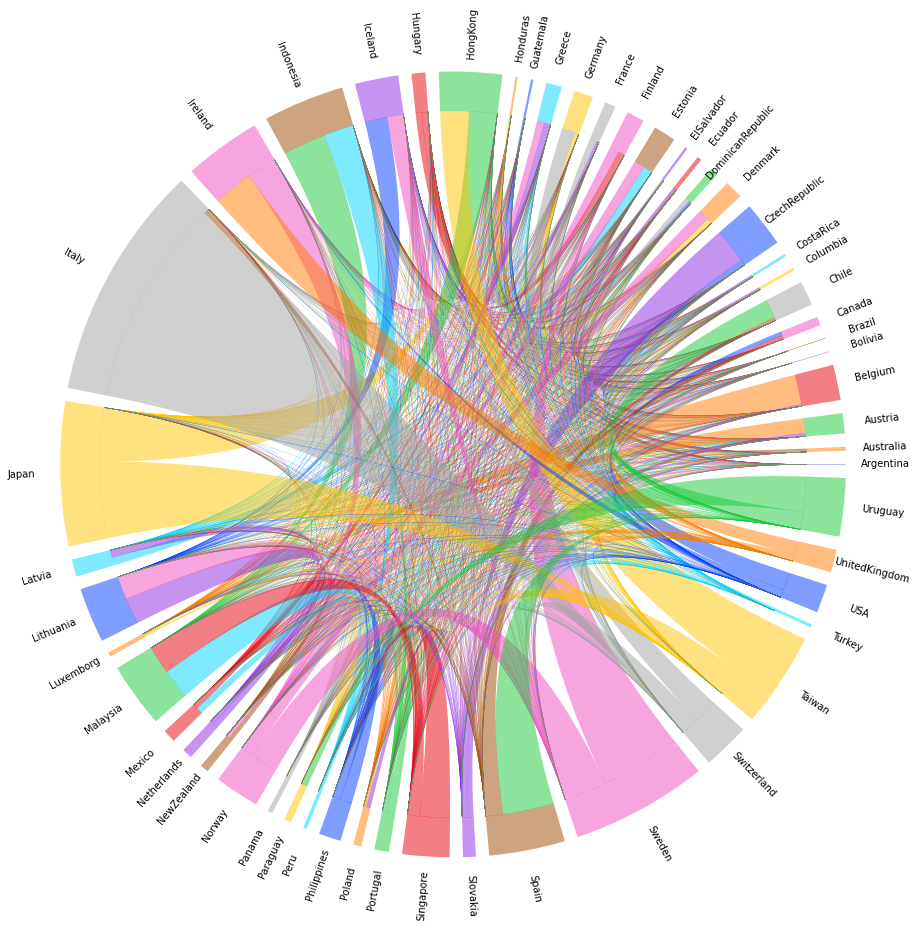

In [74]:
plot_flows(gender_sum_edges['pop'],top_to_keep=2)

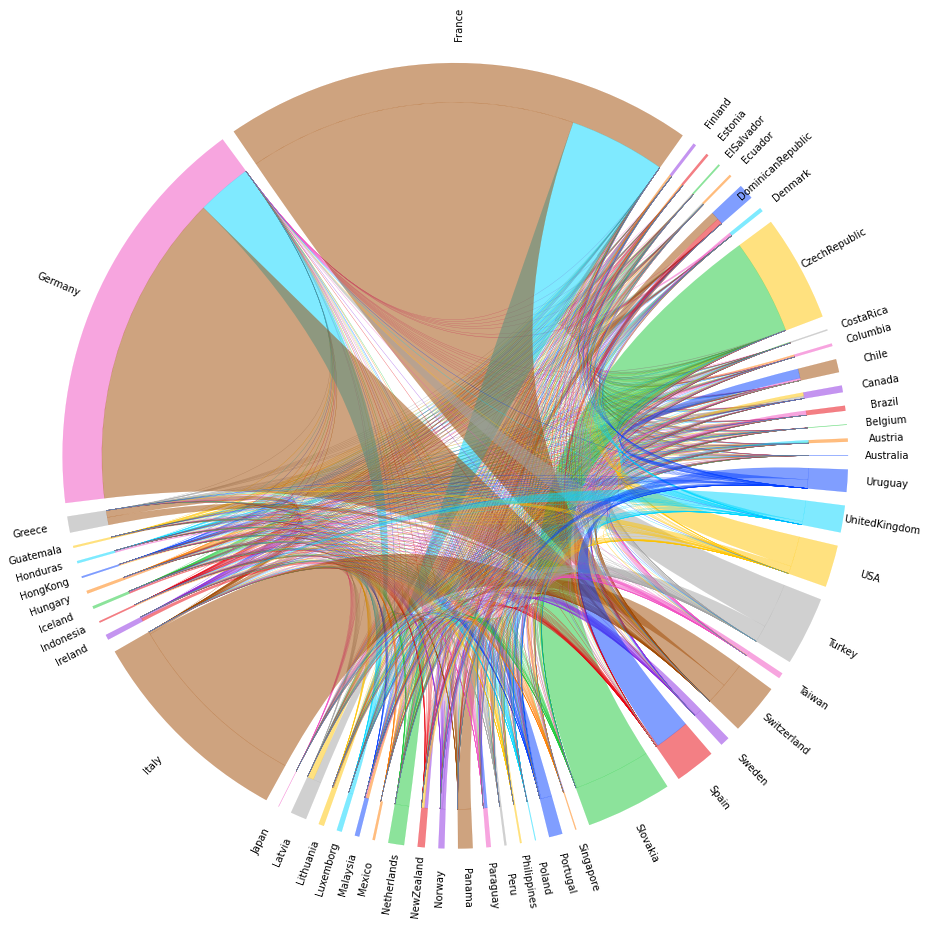

In [76]:
plot_flows(gender_sum_edges['hip-hop'],top_to_keep=2)

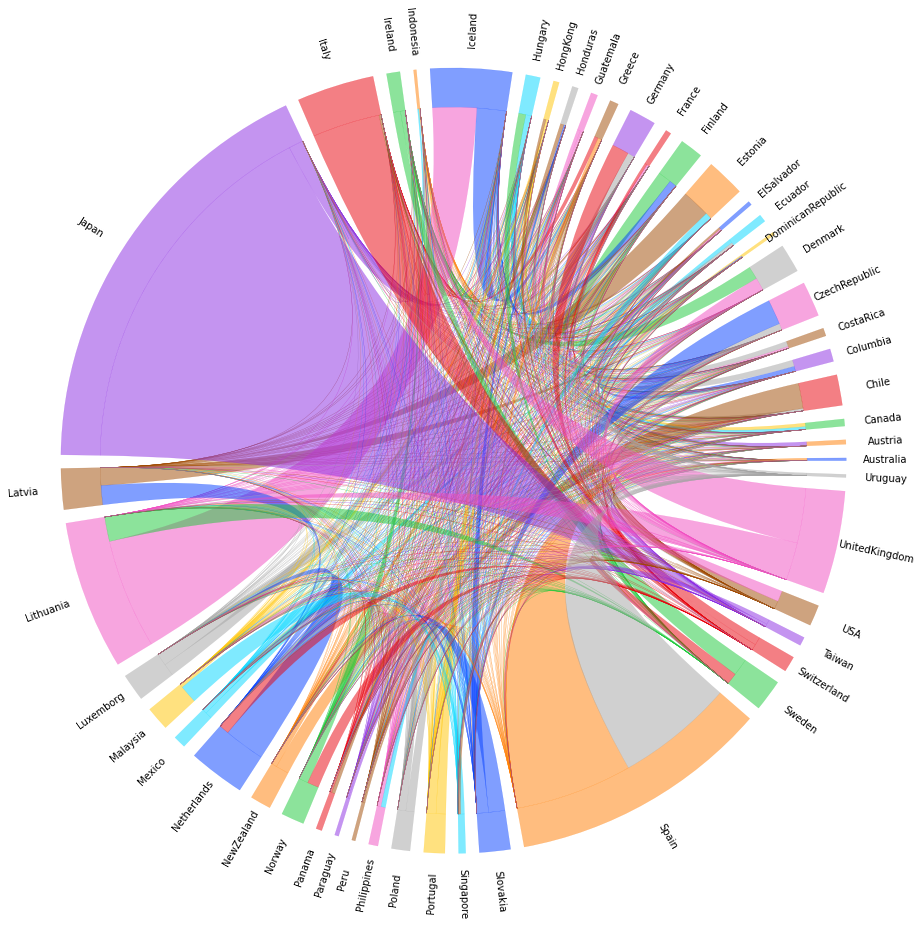

In [75]:
plot_flows(gender_sum_edges['rock'],top_to_keep=2)

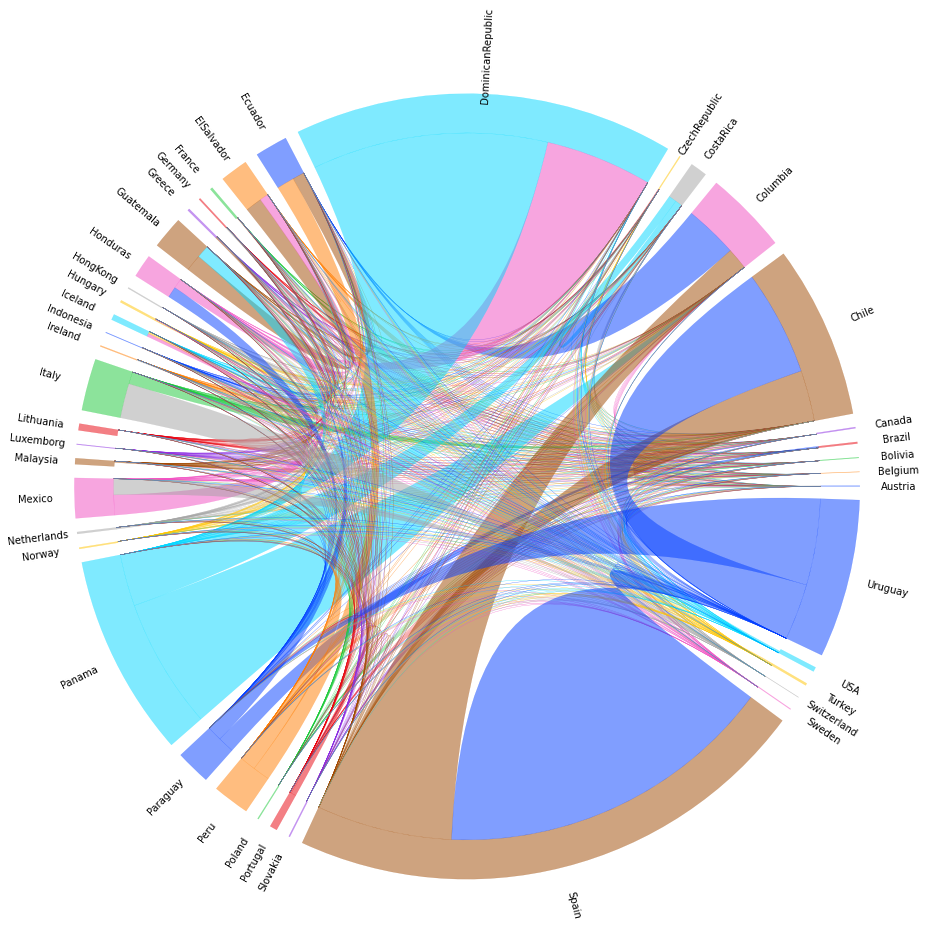

In [78]:
plot_flows(gender_sum_edges['latin'],top_to_keep=2)

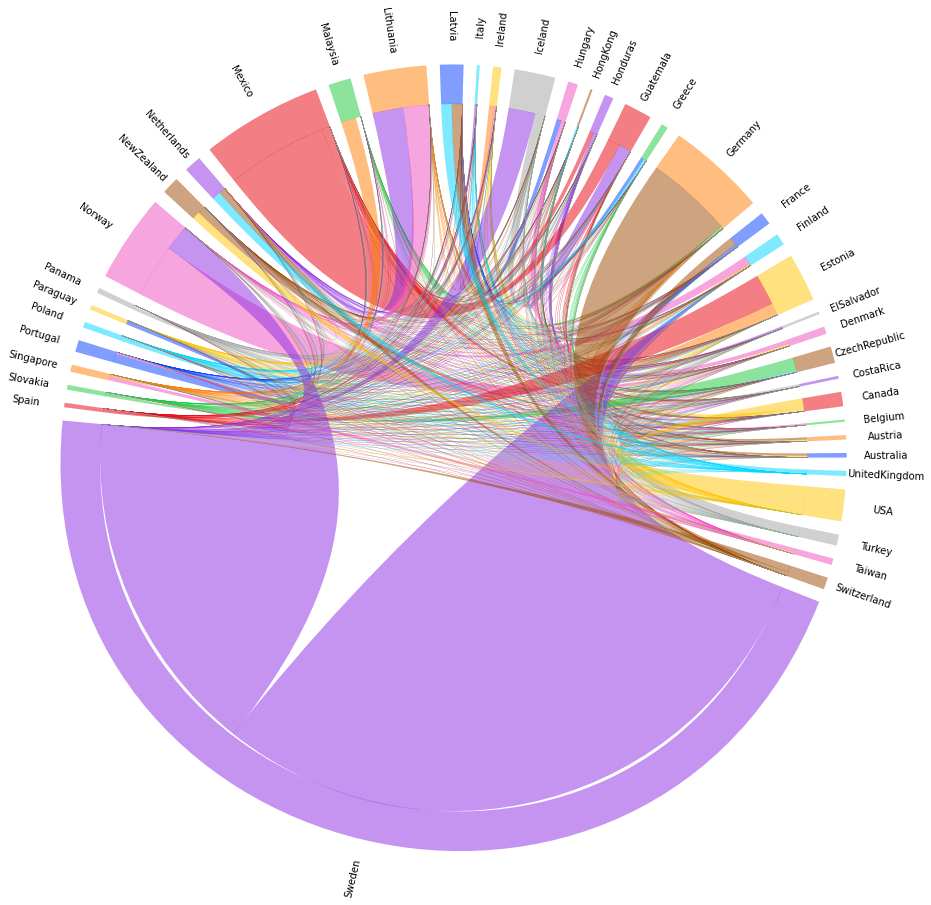

In [79]:
plot_flows(gender_sum_edges['folk/traditional'],top_to_keep=2)

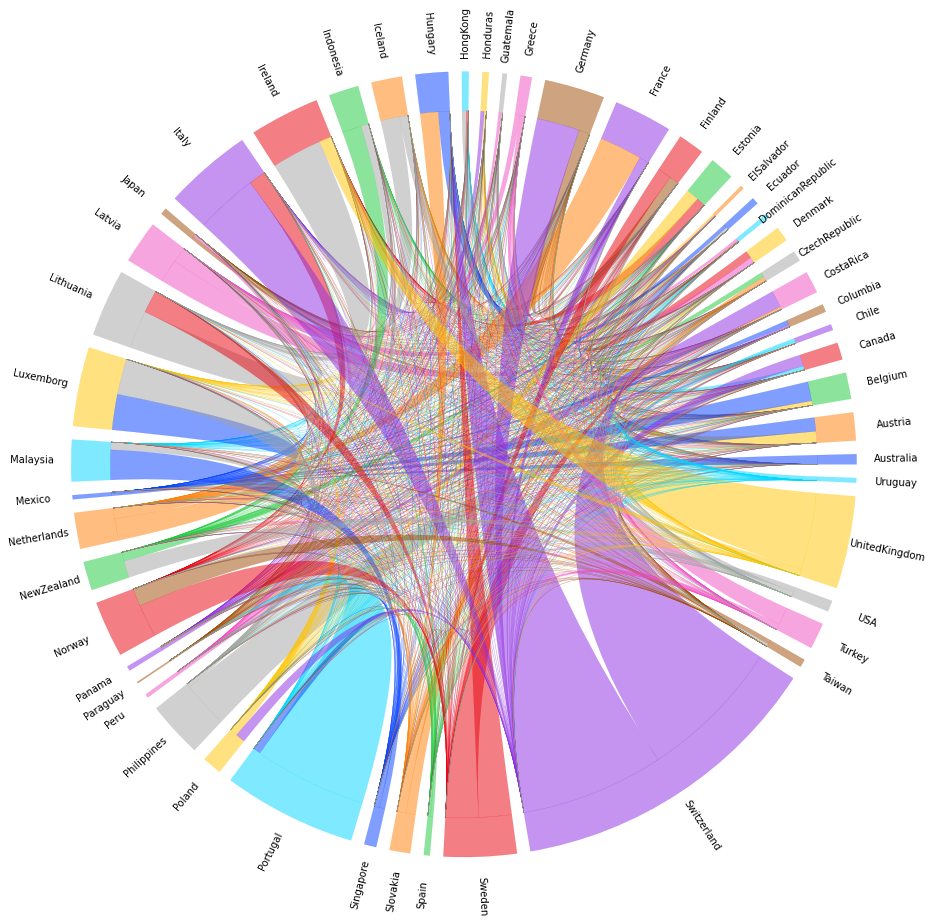

In [80]:
plot_flows(gender_sum_edges['electronic'],top_to_keep=2)

In [59]:
show_ordered_countries(gender_sum_edges, 'in_degree out_degree diff_degree'.split(), 'diff_degree')

pop
                   in_degree  out_degree  diff_degree
Germany             0.557692    0.730769     0.173077
Ireland             0.557692    0.711538     0.153846
Portugal            0.596154    0.730769     0.134615
Finland             0.576923    0.711538     0.134615
Philippines         0.692308    0.807692     0.115385
USA                 0.596154    0.692308     0.096154
Sweden              0.596154    0.692308     0.096154
Denmark             0.576923    0.673077     0.096154
Greece              0.615385    0.711538     0.096154
Australia           0.076923    0.173077     0.096154
HongKong            0.653846    0.730769     0.076923
Switzerland         0.615385    0.692308     0.076923
Iceland             0.576923    0.653846     0.076923
Latvia              0.615385    0.692308     0.076923
CzechRepublic       0.634615    0.711538     0.076923
DominicanRepublic   0.403846    0.461538     0.057692
Lithuania           0.615385    0.673077     0.057692
Netherlands         0.59

rock
                   in_degree  out_degree  diff_degree
Greece              0.230769    0.384615     0.153846
UnitedKingdom       0.230769    0.384615     0.153846
Denmark             0.096154    0.250000     0.153846
USA                 0.250000    0.365385     0.115385
Poland              0.192308    0.307692     0.115385
Japan               0.115385    0.230769     0.115385
Sweden              0.288462    0.365385     0.076923
Columbia            0.096154    0.173077     0.076923
Slovakia            0.269231    0.346154     0.076923
Ireland             0.250000    0.307692     0.057692
Panama              0.057692    0.115385     0.057692
Taiwan              0.038462    0.096154     0.057692
Peru                0.096154    0.134615     0.038462
Mexico              0.076923    0.115385     0.038462
Portugal            0.211538    0.250000     0.038462
Austria             0.000000    0.019231     0.019231
Uruguay             0.019231    0.038462     0.019231
Australia           0.0

In [60]:
show_ordered_countries(gender_sum_edges, 'in_degree out_degree betweenness'.split(), 'betweenness')

pop
                   in_degree  out_degree  betweenness
Hungary             0.557692    0.576923     0.048900
Brazil              0.076923    0.038462     0.038248
Mexico              0.384615    0.365385     0.029531
Spain               0.711538    0.634615     0.022664
Philippines         0.692308    0.807692     0.022223
Argentina           0.115385    0.019231     0.021943
Italy               0.711538    0.653846     0.020047
Germany             0.557692    0.730769     0.019056
Taiwan              0.750000    0.730769     0.018539
Austria             0.269231    0.211538     0.018109
France              0.692308    0.711538     0.017848
Slovakia            0.653846    0.692308     0.014165
Uruguay             0.423077    0.384615     0.013132
Indonesia           0.596154    0.615385     0.011950
Japan               0.653846    0.442308     0.011863
CzechRepublic       0.634615    0.711538     0.011756
Panama              0.576923    0.480769     0.011377
NewZealand          0.63

indie
                   in_degree  out_degree  betweenness
Guatemala           0.057692    0.057692     0.122844
Singapore           0.153846    0.096154     0.103506
ElSalvador          0.057692    0.096154     0.088294
Spain               0.173077    0.192308     0.087814
Lithuania           0.288462    0.365385     0.079346
Taiwan              0.192308    0.096154     0.078489
UnitedKingdom       0.326923    0.423077     0.076054
CostaRica           0.076923    0.057692     0.064109
Italy               0.192308    0.096154     0.057795
Turkey              0.153846    0.096154     0.057199
Philippines         0.057692    0.038462     0.053153
Honduras            0.057692    0.038462     0.052046
USA                 0.250000    0.192308     0.047485
France              0.211538    0.096154     0.047241
Malaysia            0.076923    0.096154     0.040532
Canada              0.173077    0.153846     0.032079
Uruguay             0.038462    0.057692     0.029329
Columbia            0.

In [61]:
print("That's all folks!")

That's all folks!
